In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_chunks(file, cols=None, city=None, chunk_size=500000):
    df = pd.read_json(path_or_buf=file, chunksize=chunk_size, lines=True)

    chunk_list = []
    for chunk in tqdm(df, desc=file):
        if city:
            chunk = chunk[chunk['city'] == city]
        if cols is None:
            chunk_list.append(chunk)
        else:
            chunk_list.append(chunk[cols])
    
    return pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

In [3]:
city_of_interest = 'Indianapolis'
df = read_chunks('../yelp_dataset/yelp_academic_dataset_business.json', city=city_of_interest)

../yelp_dataset/yelp_academic_dataset_business.json: 0it [00:00, ?it/s]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7540 entries, 0 to 7539
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   7540 non-null   object 
 1   name          7540 non-null   object 
 2   address       7540 non-null   object 
 3   city          7540 non-null   object 
 4   state         7540 non-null   object 
 5   postal_code   7540 non-null   object 
 6   latitude      7540 non-null   float64
 7   longitude     7540 non-null   float64
 8   stars         7540 non-null   float64
 9   review_count  7540 non-null   int64  
 10  is_open       7540 non-null   int64  
 11  attributes    6917 non-null   object 
 12  categories    7537 non-null   object 
 13  hours         6294 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 824.8+ KB


In [5]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
1,qhDdDeI3K4jy2KyzwFN53w,Barnes & Noble Booksellers,8675 River Crossing Blvd,Indianapolis,IN,46240,39.913820,-86.105739,4.0,38,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Shopping, Books, Mags, Music & Video, Bookstores","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
2,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Steakhouses, Asian Fusion, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
3,x1mhq4IpWctQOBM06dU8vg,Diamond Hair Company,5324 W 16th St,Indianapolis,IN,46224,39.787464,-86.251421,1.5,25,1,{'RestaurantsPriceRange2': '2'},"Hair Salons, Hair Extensions, Beauty & Spas, W...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
4,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,IN,46250,39.906295,-86.047463,3.5,257,1,"{'CoatCheck': 'False', 'Music': '{'dj': False}...","Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '..."


In [14]:
df = df.drop(['city', 'state'], axis=1)

In [7]:
df['categories'] = df['categories'].fillna('Other')

In [9]:
subset_columns = df.columns.difference(['attributes', 'hours'])
df.duplicated(subset=subset_columns).sum()

0

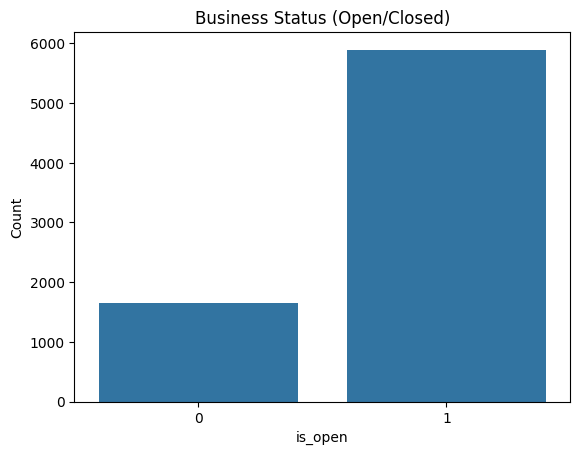

In [22]:
sns.countplot(data=df, x='is_open')
plt.title('Business Status (Open/Closed)')
plt.xlabel('is_open')
plt.ylabel('Count')
plt.show()

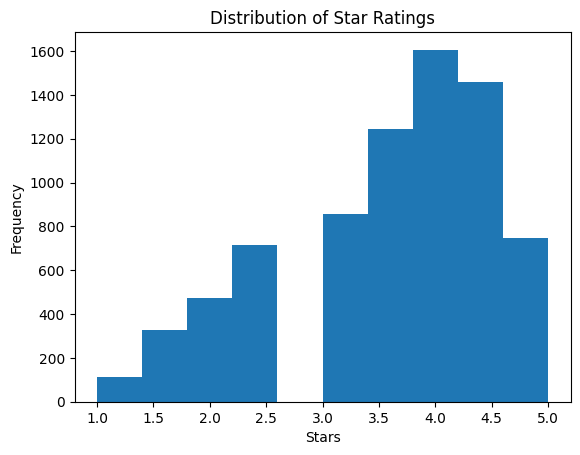

In [23]:
plt.hist(df['stars'])
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

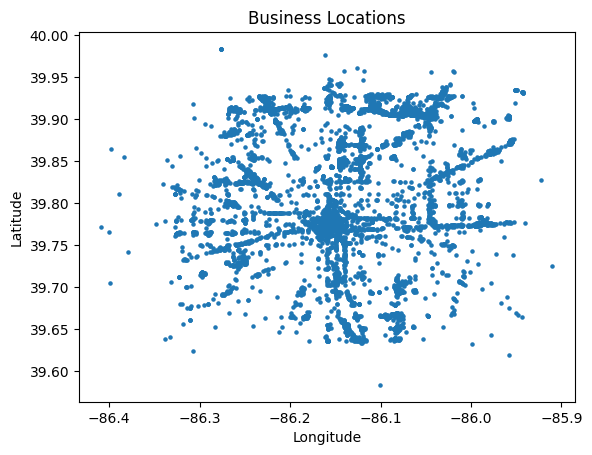

In [24]:
plt.scatter(df['longitude'], df['latitude'], s=5)
plt.title('Business Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

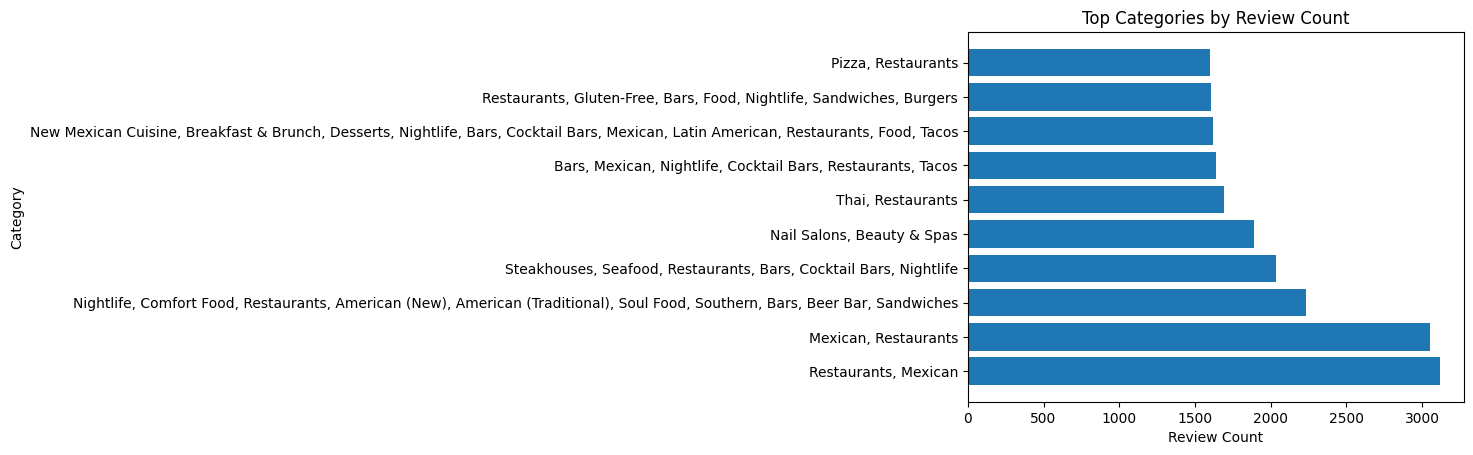

In [17]:
top_categories = df.groupby('categories')['review_count'].sum().nlargest(10)

plt.barh(top_categories.index, top_categories.values)
plt.title('Top Categories by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Category')
plt.show()

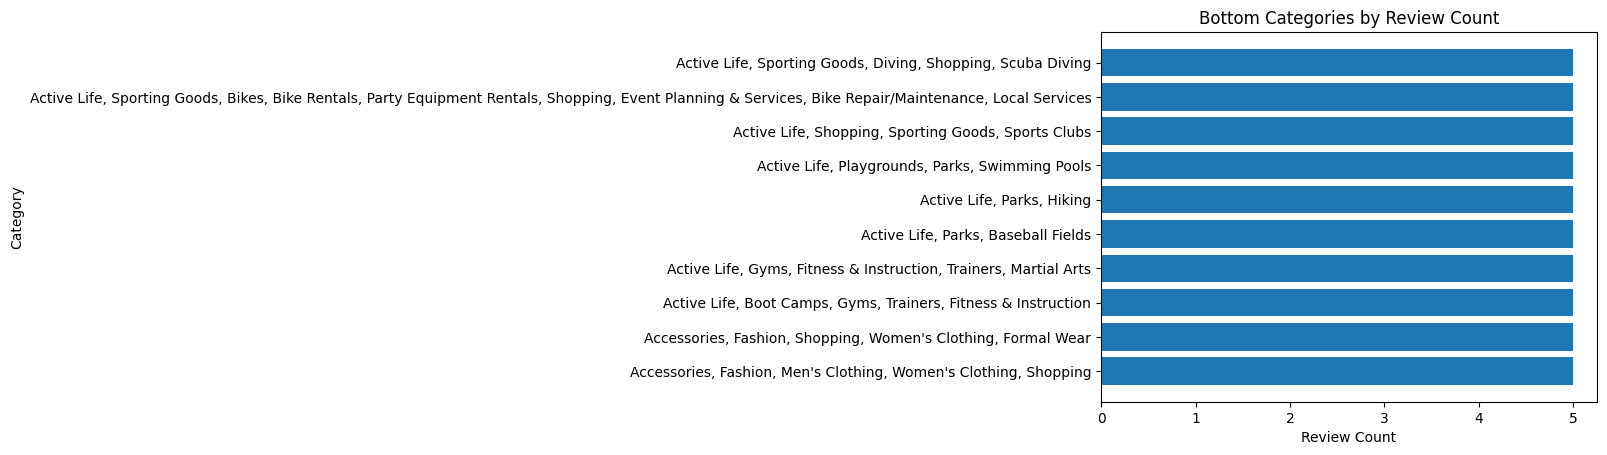

In [18]:
bottom_categories = df.groupby('categories')['review_count'].sum().nsmallest(10)

plt.barh(bottom_categories.index, bottom_categories.values)
plt.title('Bottom Categories by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Category')
plt.show()